In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.shape

(202, 26)

In [6]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

- Checking Missing Data

In [9]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

- Handling Missing Data

In [11]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Columns to convert from object to numeric
num_obj_cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

# Convert columns to numeric and fill missing values with median
for col in num_obj_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Filled missing values in {col} with median: {median_val}")

# Fill missing 'normalized-losses' with median
median_norm_losses = df['normalized-losses'].median()
df['normalized-losses'] = df['normalized-losses'].fillna(median_norm_losses)
print(f"Filled missing 'normalized-losses' with median: {median_norm_losses}")

# Fill missing 'num-of-doors' with mode
mode_doors = df['num-of-doors'].mode()[0]
df['num-of-doors'] = df['num-of-doors'].fillna(mode_doors)
print(f"Filled missing 'num-of-doors' with mode: {mode_doors}")

# Check missing values after filling
print("Missing values after imputation:\n", df.isnull().sum())

Filled missing values in bore with median: 3.31
Filled missing values in stroke with median: 3.29
Filled missing values in horsepower with median: 95.0
Filled missing values in peak-rpm with median: 5200.0
Filled missing 'normalized-losses' with median: 115.0
Filled missing 'num-of-doors' with mode: four
Missing values after imputation:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


- Feature Engineering

In [13]:
# horsepower to curb weight ratio
if 'horsepower' in df.columns and 'curb-weight' in df.columns:
    df['hp_to_curb-weight_ratio'] = df['horsepower'] / df['curb-weight']
    print("Created feature 'hp_to_curb-weight_ratio'")

# combining 'compression-ratio' and 'engine-size' to capture engine power characteristics
if 'compression-ratio' in df.columns and 'engine-size' in df.columns:
    df['compression_x_engine_size'] = df['compression-ratio'] * df['engine-size']
    print("Created feature 'compression_x_engine_size'")

Created feature 'hp_to_curb-weight_ratio'
Created feature 'compression_x_engine_size'


- EDA

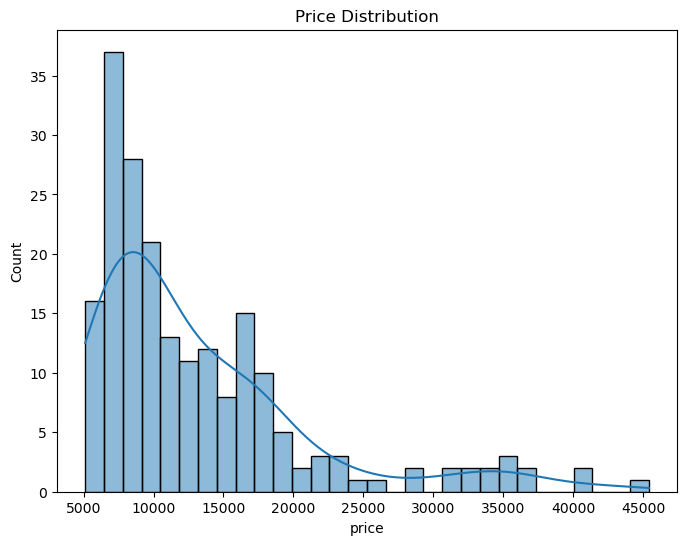

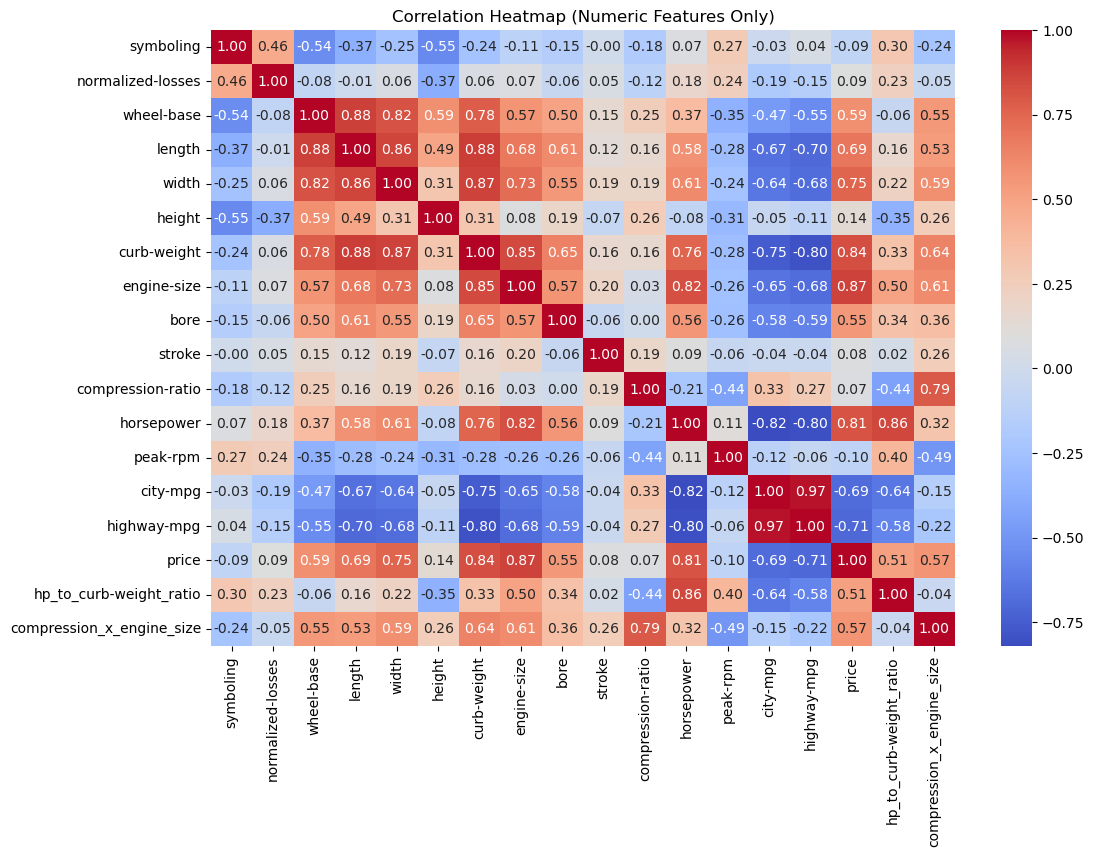

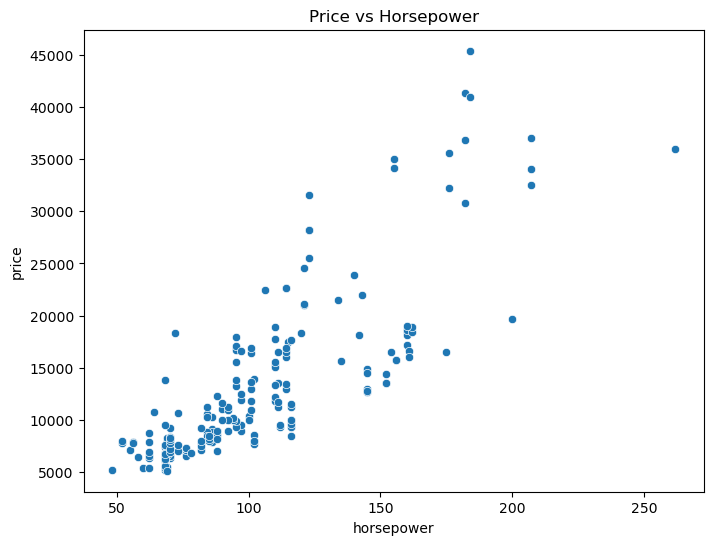

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation heatmap for numeric features

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# Scatter plot: price vs horsepower
plt.figure(figsize=(8,6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Price vs Horsepower')
plt.show()

- Data Preprocessing

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target and features
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Model Training

In [19]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linreg_model = make_pipeline(preprocessor, LinearRegression())
linreg_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_model = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=5))
knn_model.fit(X_train, y_train)
print("KNN Regression model trained.")

Linear Regression model trained.
KNN Regression model trained.


- Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    return rmse, mae, r2

print("Linear Regression performance:")
evaluate_model(linreg_model, X_test, y_test)

print("\nKNN Regression performance:")
evaluate_model(knn_model, X_test, y_test)

Linear Regression performance:
RMSE: 1001596736146591.62
MAE: 156423130181269.62
R2 Score: -8729254531081292480512.00

KNN Regression performance:
RMSE: 6166.87
MAE: 3410.93
R2 Score: 0.67


(6166.865141161131, 3410.9317073170732, 0.6690821010970909)

- Model Performance Comparision

In [23]:
import pandas as pd

# Evaluate models and store results
results = {}

rmse, mae, r2 = evaluate_model(linreg_model, X_test, y_test)
results['Linear Regression'] = {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

rmse, mae, r2 = evaluate_model(knn_model, X_test, y_test)
results['KNN Regression'] = {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

# Convert to DataFrame for better display
results_df = pd.DataFrame(results).T  # transpose for readability

print("\nModel Comparison:")
print(results_df)

RMSE: 1001596736146591.62
MAE: 156423130181269.62
R2 Score: -8729254531081292480512.00
RMSE: 6166.87
MAE: 3410.93
R2 Score: 0.67

Model Comparison:
                           RMSE           MAE      R2 Score
Linear Regression  1.001597e+15  1.564231e+14 -8.729255e+21
KNN Regression     6.166865e+03  3.410932e+03  6.690821e-01
